In [1]:
import sys
#print(sys.path)
import matplotlib.pyplot as plt
import nest

from platform import python_version
print(python_version())

ImportError: /home/ping/venv/nestml/lib/python3.9/site-packages/nest/pynestkernel.so: undefined symbol: _ZN4nest15RedrawParameterC1ERKNS_9ParameterEdd

In [1]:
from pynestml.frontend.pynestml_frontend import generate_target

generate_target(input_path="/home/ping/nestml/nestml/models/synapses/static_synapse.nestml",
                target_platform="NEST",
                target_path="/home/ping/nestml/nestml_target",
                suffix= "_nestml",
                logging_level="ERROR")
#codegen_opts={"nest_version":"v3.0"}
print('Hi')

#["/home/ping/nestml/nestml/models/neurons/iaf_psc_bix.nestml",
#                            "/home/ping/nestml/nestml/models/neurons/iaf_psc_alpha.nestml"],

ImportError: /home/ping/venv/nestml/lib/python3.9/site-packages/nest/pynestkernel.so: undefined symbol: _ZN4nest15RedrawParameterC1ERKNS_9ParameterEdd

In [2]:
generate_target(input_path="/home/ping/nestml/nestml/models/neurons/iaf_psc_alpha.nestml",
                target_platform="NEST",
                target_path="/home/ping/nestml/nestml_target",
                suffix="_nestml")

ImportError: /home/ping/venv/nestml/lib/python3.9/site-packages/nest/pynestkernel.so: undefined symbol: _ZN4nest15RedrawParameterC1ERKNS_9ParameterEdd

In [3]:
nest.Install("nestmlmodule")

In [ ]:
nest.ResetKernel()

# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("iaf_psc_alpha",1)
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"synapse_model": "static_nestml", "receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

fig, ax = plt.subplots(2,1)
ax[0].plot(t, events['V_m'])
ax[0].set_title('V_m')
#ax[1].plot(t, events['I_syn'])
#ax[1].set_title('I_syn')


Oct 17 16:06:17 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Oct 17 16:06:17 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Oct 17 16:06:17 SimulationManager::run [Info]: 
    Simulation finished.


Text(0.5, 1.0, 'I_syn')

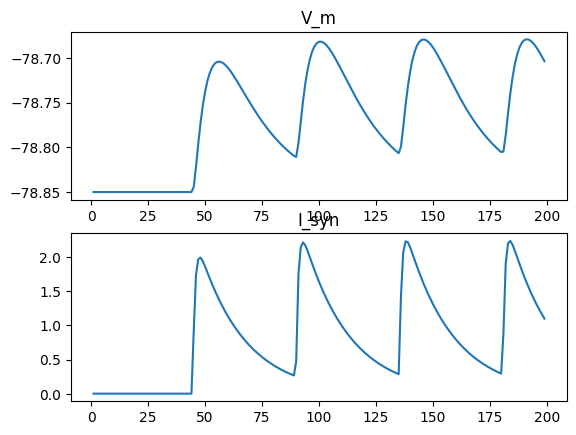

In [7]:
# Examine glif with alpha synapse

nest.ResetKernel()

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("glif_psc_bix")
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 1, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

fig, ax = plt.subplots(2,1)
ax[0].plot(t, events['V_m'])
ax[0].set_title('V_m')
ax[1].plot(t, events['I_syn'])
ax[1].set_title('I_syn')



Nov 04 14:33:51 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 04 14:33:51 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 14:33:51 SimulationManager::run [Info]: 
    Simulation finished.


KeyError: 'I_syn'

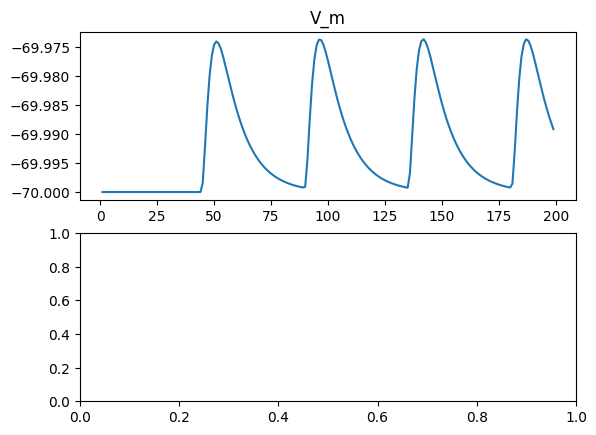

In [5]:
nest.ResetKernel()

# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("iaf_psc_alpha",1)
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

fig, ax = plt.subplots(2,1)
ax[0].plot(t, events['V_m'])
ax[0].set_title('V_m')
ax[1].plot(t, events['I_syn'])
ax[1].set_title('I_syn')


Nov 04 14:34:04 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 04 14:34:04 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 14:34:04 SimulationManager::run [Info]: 
    Simulation finished.


KeyError: 'I_syn'

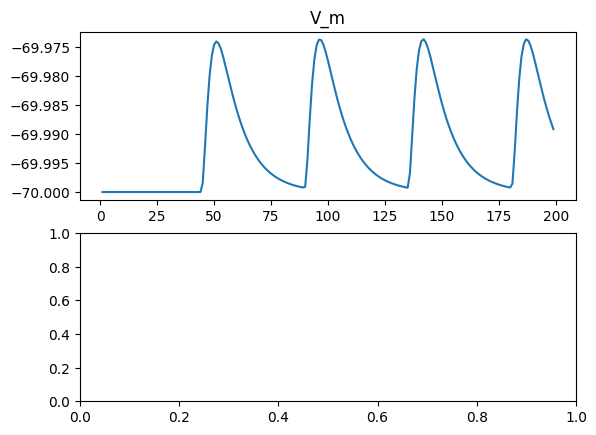

In [6]:
nest.ResetKernel()

# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("iaf_psc_alpha_nestml",1)
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

fig, ax = plt.subplots(2,1)
ax[0].plot(t, events['V_m'])
ax[0].set_title('V_m')
ax[1].plot(t, events['I_syn'])
ax[1].set_title('I_syn')


Nov 04 14:35:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 04 14:35:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 14:35:16 SimulationManager::run [Info]: 
    Simulation finished.


KeyError: 'I_syn'

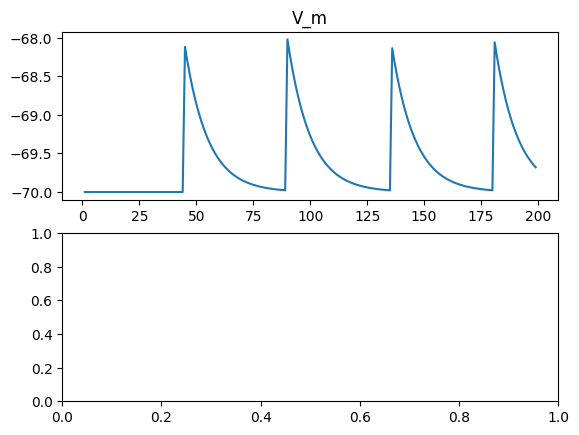

In [7]:
nest.ResetKernel()

# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("iaf_psc_delta",1)
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

fig, ax = plt.subplots(2,1)
ax[0].plot(t, events['V_m'])
ax[0].set_title('V_m')
ax[1].plot(t, events['I_syn'])
ax[1].set_title('I_syn')

In [15]:
A = ['yo']

b = ['hi','lo']

A.extend(b)

In [16]:
A

['yo', 'hi', 'lo']

In [21]:
print ('Generating NESTML models:' , A)

Generating NESTML models: ['yo', 'hi', 'lo']


In [18]:
print (A)

['yo', 'hi', 'lo']


In [22]:
model_name = 'static_synapse'
b = 'nest:' + model_name + '_nestml'

In [23]:
b

'nest:static_synapse_nestml'

In [4]:
nest.Models()

('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_hpc',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_hpc',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'glif_cond',
 'glif_psc',
 'glif_psc_bix',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'ht_syn